In [10]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import graphviz
import pydotplus
import io
from scipy import misc
sb.set(style='ticks')
rcParams['figure.figsize'] = 5,5
warnings.filterwarnings("ignore")
%matplotlib inline

ModuleNotFoundError: No module named 'graphviz'

In [11]:
# Read Test and Train
train_df = pd.read_csv("data.csv")

In [12]:
train_df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
#
Import Dataset
Exploratory Data Analysis to vizualize data and observe structure
Train a classifier
Predict target using the trainied classifer


In [14]:
train_df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [16]:
#Split train and test data


In [17]:
train,test=train_test_split(train_df,test_size=0.15)

In [18]:
#test from the sizes

In [19]:
print("Training size {}: Test size {}".format(len(train),len(test)))

Training size 1714: Test size 303


In [20]:
#Or take the shape

In [21]:
train.shape

(1714, 17)

In [22]:
#Creat a variable for the query syntax
pos_tempo = train_df [train_df['target']==1]['tempo']
neg_tempo = train_df [train_df['target']==0]['tempo']


In [23]:
pos_tempo

0       150.062
1       160.083
2        75.044
3        86.468
4       174.004
5        85.023
6        80.030
7       144.154
8       130.035
9        99.994
10      111.951
11      104.322
12      127.681
13      130.007
14      125.011
15       99.988
16      123.922
17      122.415
18      140.061
19      109.982
20      128.049
21      130.031
22      139.922
23      138.022
24       94.498
25      109.977
26      110.016
27      100.040
28      120.021
29      129.004
         ...   
990      96.990
991      96.006
992     174.062
993     130.032
994     125.993
995     129.948
996     142.584
997     142.911
998     113.074
999     174.589
1000    149.948
1001    139.639
1002    140.157
1003    139.096
1004    136.213
1005    129.989
1006    137.644
1007    137.905
1008    139.608
1009    139.725
1010    139.871
1011    139.870
1012    125.462
1013    144.256
1014     83.204
1015    139.997
1016     86.733
1017    140.008
1018    147.072
1019    107.039
Name: tempo, Length: 102

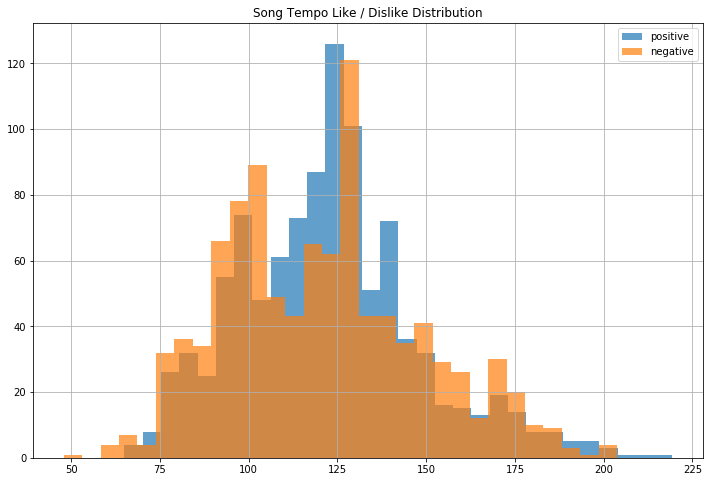

In [24]:
fig = plt.figure(figsize=(12,8))
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha=0.7,bins=30,label='positive')
neg_tempo.hist(alpha=0.7,bins=30,label='negative')
plt.legend(loc="upper right")

In [25]:
c=DecisionTreeClassifier(min_samples_split=100)

In [26]:
#Overfitting

In [27]:
features=["acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"
]

In [28]:
x_train=train[features]
y_train=train['target']

x_test=train[features]
y_test=train['target']

In [29]:
dt = c.fit(x_train,y_train)

In [30]:
def show_tree(tree,features,path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)

    #read image from a file as an array   
    img = misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

    

In [31]:
show_tree(dt,features,'dec_tree_01.png')

NameError: name 'io' is not defined

In [32]:
y_pred =c.predict(x_test)

In [33]:
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)